## 1. Veri Hazırlama ve Özellik Seçimi
Veri kümesinden kümelenmeye uygun özellikler seçilir. Bu özellikler, davaların süresi, tanık sayısı, masraflar ve delil sayısı gibi değişkenlerdir. Daha sonra ölçekleme yapılarak tüm değişkenler aynı düzeye getirilir. Bu adım, algoritmanın farklı ölçekteki verilerden etkilenmesini önler.


In [1]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Veri Hazırlama ve Özellik Seçimi
df = pd.read_csv("dava.csv")
features = ["Case Duration (Days)", "Number of Witnesses", 
            "Legal Fees (USD)", "Number of Evidence Items"]
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 2. Optimal Küme Sayısının Belirlenmesi (Elbow Yöntemi)
Elbow yöntemi, farklı k değerleri için K-Means modelinin hata (inertia) değerlerini hesaplar. Grafik üzerinde, eğrinin kırılma noktası kümelerin doğal sayısını verir. Bu nokta, modelin hem yüksek doğruluk hem de düşük karmaşıklıkla çalışmasını sağlar. Böylece fazla veya yetersiz kümelemeyi önlemek mümkün olur.


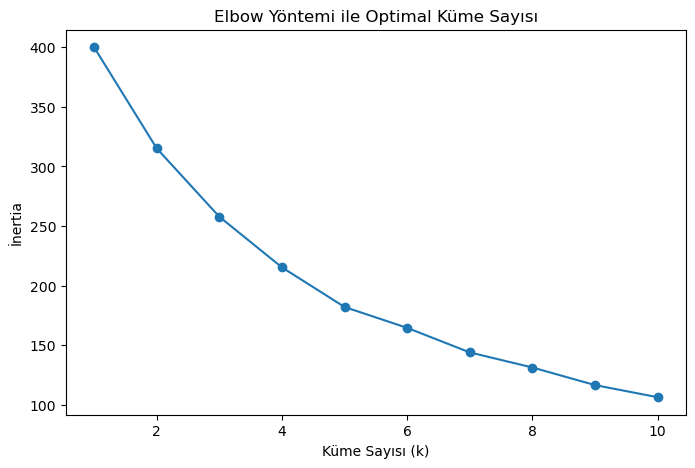

In [2]:
warnings.filterwarnings("ignore")

inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker="o")
plt.title("Elbow Yöntemi ile Optimal Küme Sayısı")
plt.xlabel("Küme Sayısı (k)")
plt.ylabel("İnertia")
plt.show()

## 3. K-Means Kümeleme Uygulaması
Seçilen küme sayısına göre K-Means algoritması veriye uygulanır. Algoritma, gözlemleri kümelere ayırırken her gözlemi en yakın merkeze atar. Küme merkezleri tekrar tekrar güncellenerek en uygun dağılım bulunur. Sonuçta her gözlem belirli bir kümeye atanır ve veri kümelenmiş hale gelir.


In [3]:
optimal_k = 3  
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)
df["Cluster"] = clusters

## 4. Kümeleme Sonuçlarının Görselleştirilmesi ve Yorumlanması
Kümeleme sonuçları PCA ile iki boyuta indirgenerek görselleştirilir. Bu grafik, kümelerin ayrışma düzeyini görmeye ve kümeler arası farklılıkları yorumlamaya olanak sağlar. Görselleştirme sayesinde modelin ne kadar başarılı olduğu gözlemlenebilir.


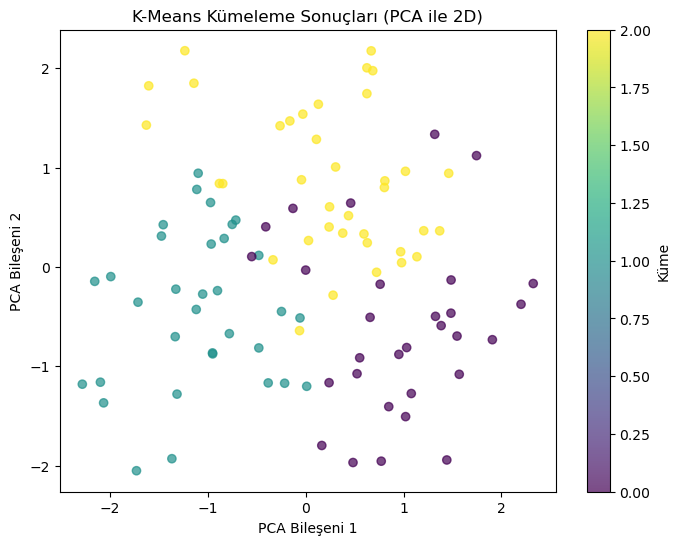

   Unnamed: 0  Case Duration (Days)  Number of Witnesses  Legal Fees (USD)  \
0           0                   132                    8             35206   
1           1                   300                   12             46106   
2           2                   136                    2             16411   
3           3                   101                    1              7911   
4           4                   218                   16              6734   

   Number of Evidence Items  Severity  Outcome  Cluster  
0                        49         2        0        0  
1                        46         2        1        0  
2                        31         1        1        1  
3                        35         1        0        1  
4                        33         1        0        0  


In [4]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap="viridis", alpha=0.7)
plt.title("K-Means Kümeleme Sonuçları (PCA ile 2D)")
plt.xlabel("PCA Bileşeni 1")
plt.ylabel("PCA Bileşeni 2")
plt.colorbar(label="Küme")
plt.show()

print(df.head())

###  Sonuç yorumu

- K-Means, verideki doğal yapıyı yakalamış. Eğer bu bir iş veya bilimsel veri ise, kümeler farklı müşteri gruplarını, olay türlerini veya veri segmentlerini temsil ediyor olabilir. İç içe geçmiş noktalar için küme sayısını artırmak veya farklı bir algoritma (DBSCAN, HDBSCAN) denemek mantıklı olabilir.